# BlackCoffer Project 

###  Text Analysis


In [1]:
# importing the required libraries
!pip install wordcloud

from bs4 import BeautifulSoup,SoupStrainer
import requests
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from textblob import Word, TextBlob
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import wordcloud

import warnings 
warnings.filterwarnings('ignore')

In [20]:
df = pd.read_excel("D:\Blackcoffer\Input.xlsx")
df

,URL_ID,URL
0,123.0,https://insights.blackcoffer.com/rise-of-telem...
1,321.0,https://insights.blackcoffer.com/rise-of-e-hea...
2,2345.0,https://insights.blackcoffer.com/rise-of-e-hea...
3,4321.0,https://insights.blackcoffer.com/rise-of-telem...
4,432.0,https://insights.blackcoffer.com/rise-of-telem...
...,...,...
109,50921.0,https://insights.blackcoffer.com/coronavirus-i...
110,51382.8,https://insights.blackcoffer.com/coronavirus-i...
111,51844.6,https://insights.blackcoffer.com/what-are-the-...
112,52306.4,https://insights.blackcoffer.com/marketing-dri...


In [51]:
urls = df.URL

In [52]:
pd.set_option("display.max_rows", None)
urls

0      https://insights.blackcoffer.com/rise-of-telem...
1      https://insights.blackcoffer.com/rise-of-e-hea...
2      https://insights.blackcoffer.com/rise-of-e-hea...
3      https://insights.blackcoffer.com/rise-of-telem...
4      https://insights.blackcoffer.com/rise-of-telem...
5      https://insights.blackcoffer.com/rise-of-chatb...
6      https://insights.blackcoffer.com/rise-of-e-hea...
7      https://insights.blackcoffer.com/how-does-mark...
8      https://insights.blackcoffer.com/how-advertise...
9      https://insights.blackcoffer.com/negative-effe...
10     https://insights.blackcoffer.com/how-advertise...
11     https://insights.blackcoffer.com/rising-it-cit...
12     https://insights.blackcoffer.com/rise-of-ott-p...
13     https://insights.blackcoffer.com/rise-of-elect...
14     https://insights.blackcoffer.com/rise-of-elect...
15     https://insights.blackcoffer.com/oil-prices-by...
16     https://insights.blackcoffer.com/an-outlook-of...
17     https://insights.blackco

In [59]:
Tittle = []
Text = []
url = []

for i in urls:
    page = requests.get(i)
    soup = BeautifulSoup(page.content)
    # Check if the element exists on the page before appending to the lists
    title_element = soup.find("h1", class_="entry-title")
    if title_element:
        Tittle.append(title_element.text)
        url.append(i)
    
    text_element = soup.find("div", class_="td-post-content tagdiv-type")
    if text_element:
        Text.append(text_element.text)

# Create a DataFrame after collecting data
df1 = pd.DataFrame({'URL':url,'Tittle': Tittle, 'Text': Text})


In [3]:
df1

,URL,Tittle,Text
0,https://insights.blackcoffer.com/rise-of-telem...,Rise of telemedicine and its Impact on Livelih...,"\nTelemedicine, the use of technology to diagn..."
1,https://insights.blackcoffer.com/rise-of-e-hea...,Rise of e-health and its impact on humans by t...,"\nThe rise of e-health, or the use of electron..."
2,https://insights.blackcoffer.com/rise-of-telem...,Rise of telemedicine and its Impact on Livelih...,"\n“More gains on quality, affordability and ac..."
3,https://insights.blackcoffer.com/rise-of-telem...,Rise of telemedicine and its Impact on Livelih...,"\n“More gains on quality, affordability and ac..."
4,https://insights.blackcoffer.com/rise-of-chatb...,Rise of Chatbots and its impact on customer su...,\nThe human race is known to come up with inve...
...,...,...,...
97,https://insights.blackcoffer.com/coronavirus-i...,Coronavirus: Impact on the Hospitality Industry,\nBefore jumping on the topic I would like to ...
98,https://insights.blackcoffer.com/coronavirus-i...,Coronavirus impact on energy markets,\nAs the coronavirus spreads around the world ...
99,https://insights.blackcoffer.com/what-are-the-...,What are the key policies that will mitigate t...,"\nFrom Alibaba to Ping An and Google to Ford, ..."
100,https://insights.blackcoffer.com/marketing-dri...,Marketing Drives Results With A Focus On Problems,"\nWhen\nthe British ruled India, many Indians\..."


In [4]:
# checking null values 
df1.isnull().sum()

URL       0
Tittle    0
Text      0
dtype: int64

In [5]:
# checking duplicate values
df1.duplicated().sum()

0

#### Feature Extraction

In [6]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
df1['No of character'] = df1['Text'].apply(len)
df1['No of word'] = df1['Text'].apply(lambda x:len(nltk.word_tokenize(x)))
df1['No of sentences'] = df1['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [8]:
df1

,URL,Tittle,Text,No of character,No of word,No of sentences
0,https://insights.blackcoffer.com/rise-of-telem...,Rise of telemedicine and its Impact on Livelih...,"\nTelemedicine, the use of technology to diagn...",11175,1850,80
1,https://insights.blackcoffer.com/rise-of-e-hea...,Rise of e-health and its impact on humans by t...,"\nThe rise of e-health, or the use of electron...",4013,664,25
2,https://insights.blackcoffer.com/rise-of-telem...,Rise of telemedicine and its Impact on Livelih...,"\n“More gains on quality, affordability and ac...",8176,1374,60
3,https://insights.blackcoffer.com/rise-of-telem...,Rise of telemedicine and its Impact on Livelih...,"\n“More gains on quality, affordability and ac...",8176,1374,60
4,https://insights.blackcoffer.com/rise-of-chatb...,Rise of Chatbots and its impact on customer su...,\nThe human race is known to come up with inve...,7664,1302,65
...,...,...,...,...,...,...
97,https://insights.blackcoffer.com/coronavirus-i...,Coronavirus: Impact on the Hospitality Industry,\nBefore jumping on the topic I would like to ...,4413,765,30
98,https://insights.blackcoffer.com/coronavirus-i...,Coronavirus impact on energy markets,\nAs the coronavirus spreads around the world ...,10596,1887,50
99,https://insights.blackcoffer.com/what-are-the-...,What are the key policies that will mitigate t...,"\nFrom Alibaba to Ping An and Google to Ford, ...",11114,1961,70
100,https://insights.blackcoffer.com/marketing-dri...,Marketing Drives Results With A Focus On Problems,"\nWhen\nthe British ruled India, many Indians\...",8714,1580,59


In [9]:
# Load positive and negative word lists
with open('positive-words.txt', 'r') as positive_file:
    positive_words = set(positive_file.read().split())

with open('negative-words.txt', 'r') as negative_file:
    negative_words = set(negative_file.read().split())

In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

# Download necessary NLTK data if not already downloaded
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
import nltk
import pandas as pd
from textblob import TextBlob

# Calculate Positive Score
df1['Positive Score'] = df1['Text'].apply(lambda x: len([word for word in nltk.word_tokenize(x) if word in positive_words]))

# Calculate Negative Score
df1['Negative Score'] = df1['Text'].apply(lambda x: len([word for word in nltk.word_tokenize(x) if word in negative_words]))

# Calculate Polarity Score using TextBlob
df1['Polarity Score'] = df1['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Calculate Subjectivity Score using TextBlob
df1['Subjectivity Score'] = df1['Text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Calculate Average Sentence Length
df1['Avg Sentence Length'] = df1['No of character'] / df1['No of sentences']

# Calculate Percentage of Complex Words
def is_complex_word(word):
    return len(word) > 6  # You can adjust the threshold for complexity

df1['Percentage of Complex Words'] = df1['Text'].apply(lambda x: sum(1 for word in nltk.word_tokenize(x) if is_complex_word(word)) / len(nltk.word_tokenize(x)))

# Calculate Fog Index
df1['Fog Index'] = 0.4 * (df1['Avg Sentence Length'] + df1['Percentage of Complex Words'])

# Calculate Average Number of Words per Sentence
df1['Avg Number of Words per Sentence'] = df1['No of word'] / df1['No of sentences']

# Calculate Complex Word Count
df1['Complex Word Count'] = df1['Text'].apply(lambda x: sum(1 for word in nltk.word_tokenize(x) if is_complex_word(word)))

# Calculate Word Count
df1['Word Count'] = df1['Text'].apply(lambda x: len(nltk.word_tokenize(x)))

# Calculate Syllables per Word
def count_syllables(word):
    # You can use a library like Pyphen to count syllables accurately
    # Here, we'll use a simple heuristic
    vowels = "AEIOUaeiou"
    count = 0
    for char in word:
        if char in vowels:
            count += 1
    return count

df1['Syllables per Word'] = df1['Text'].apply(lambda x: sum(count_syllables(word) for word in nltk.word_tokenize(x)) / len(nltk.word_tokenize(x)))

# Calculate Personal Pronouns
personal_pronouns = set(['I', 'me', 'my', 'mine', 'myself', 'we', 'us', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves'])
df1['Personal Pronouns'] = df1['Text'].apply(lambda x: len([word for word in nltk.word_tokenize(x) if word.lower() in personal_pronouns]))

# Calculate Average Word Length
df1['Avg Word Length'] = df1.apply(lambda row: row['No of character'] / row['Word Count'], axis=1)


In [12]:
df1.head(2)

,URL,Tittle,Text,No of character,No of word,No of sentences,Positive Score,Negative Score,Polarity Score,Subjectivity Score,Avg Sentence Length,Percentage of Complex Words,Fog Index,Avg Number of Words per Sentence,Complex Word Count,Word Count,Syllables per Word,Personal Pronouns,Avg Word Length
0,https://insights.blackcoffer.com/rise-of-telem...,Rise of telemedicine and its Impact on Livelih...,"\nTelemedicine, the use of technology to diagn...",11175,1850,80,83,24,0.136034,0.437280,139.6875,0.319459,56.002784,23.125,591,1850,2.002162,46,6.040541
1,https://insights.blackcoffer.com/rise-of-e-hea...,Rise of e-health and its impact on humans by t...,"\nThe rise of e-health, or the use of electron...",4013,664,25,41,13,0.111801,0.615704,160.5200,0.332831,64.341133,26.560,221,664,1.986446,19,6.043675


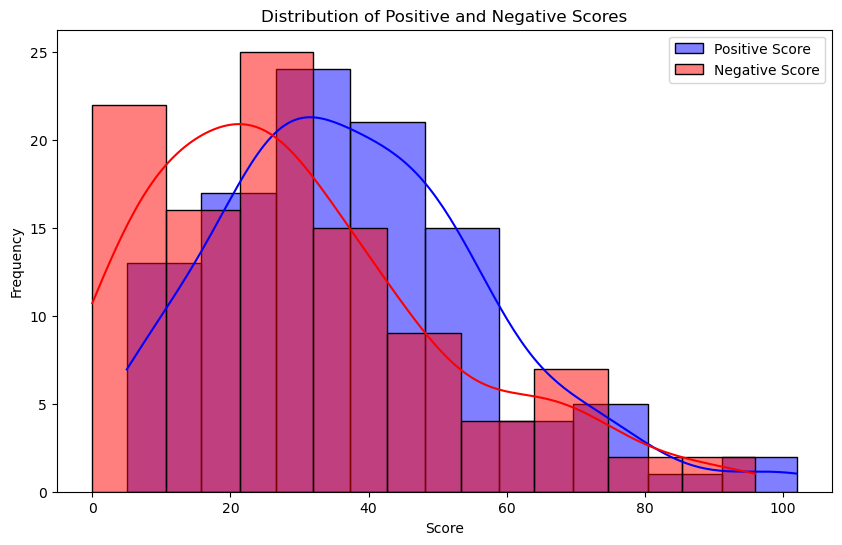

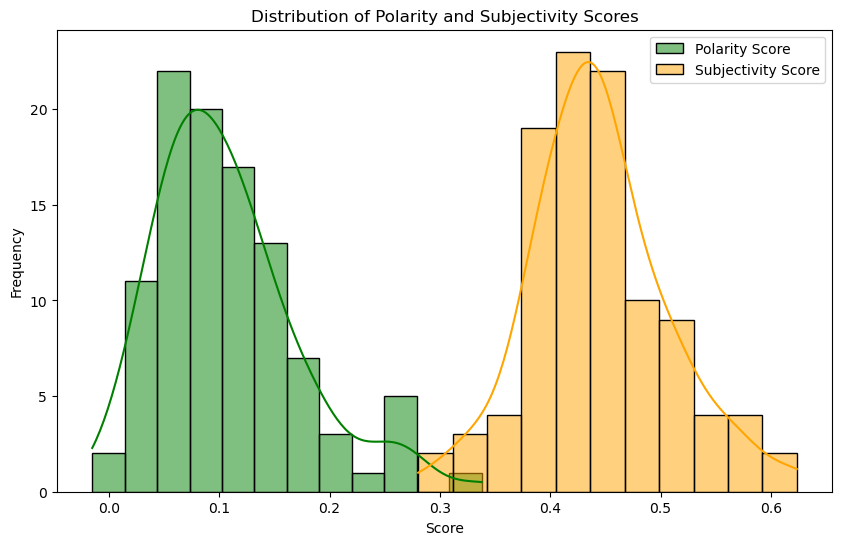

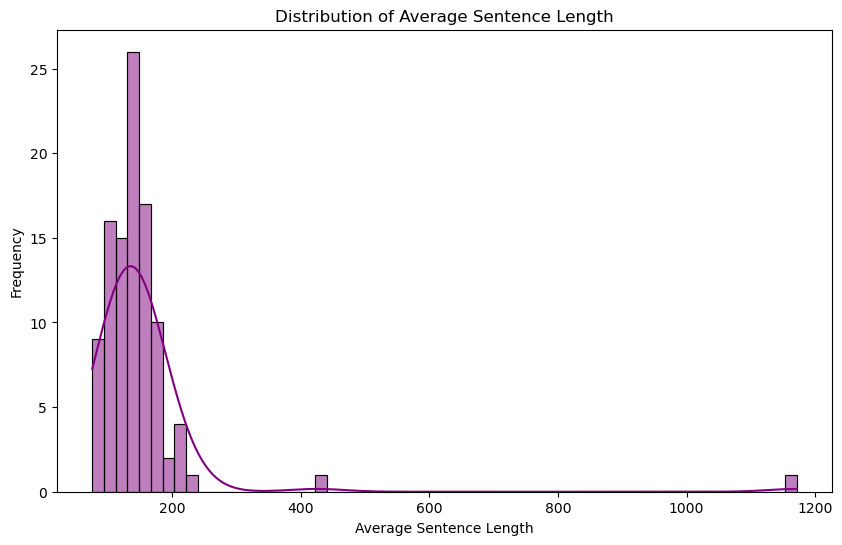

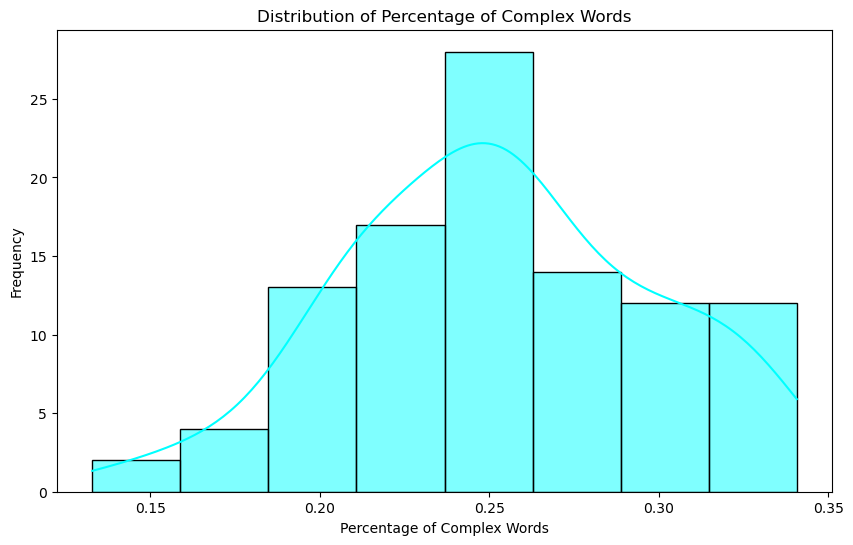

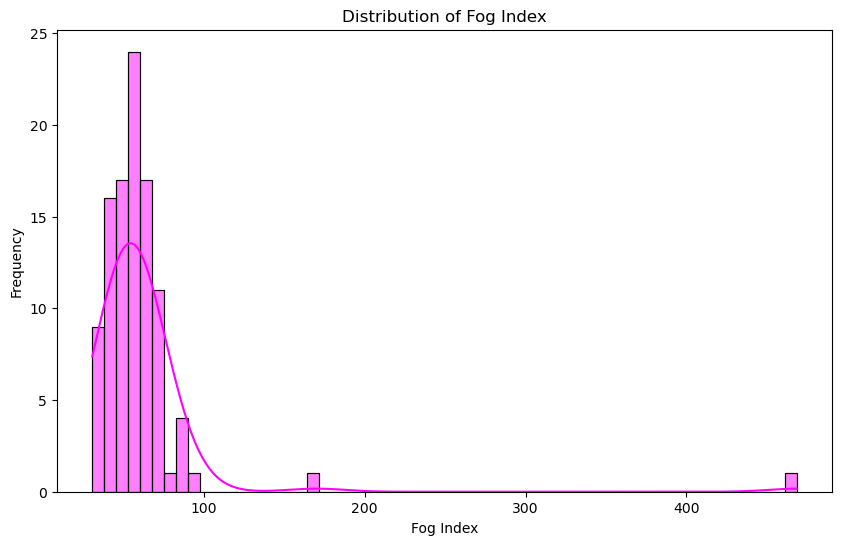

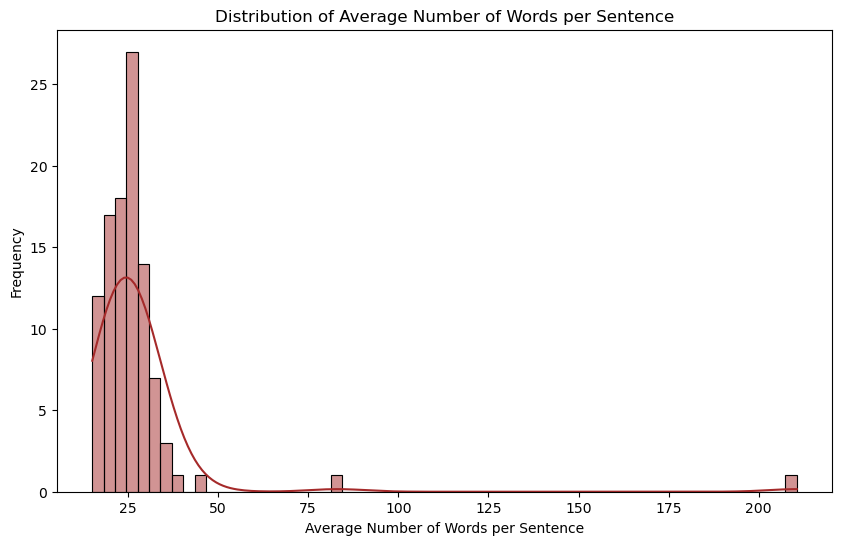

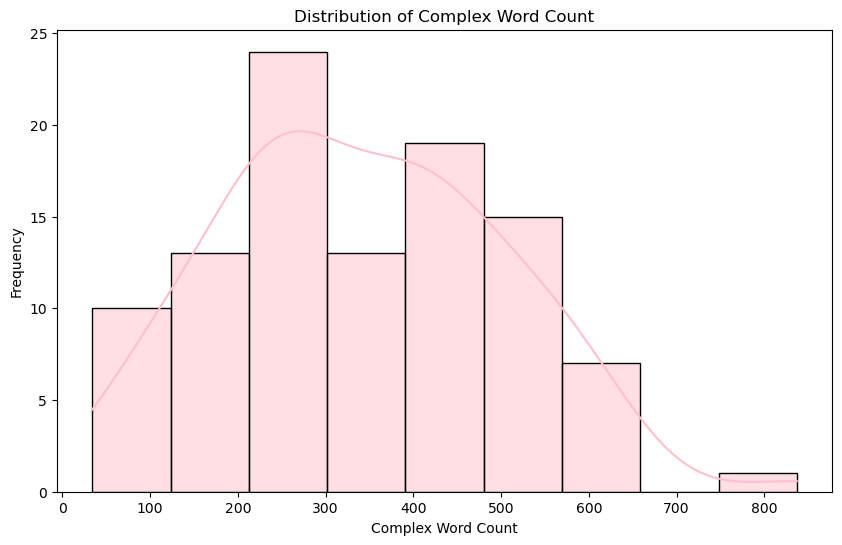

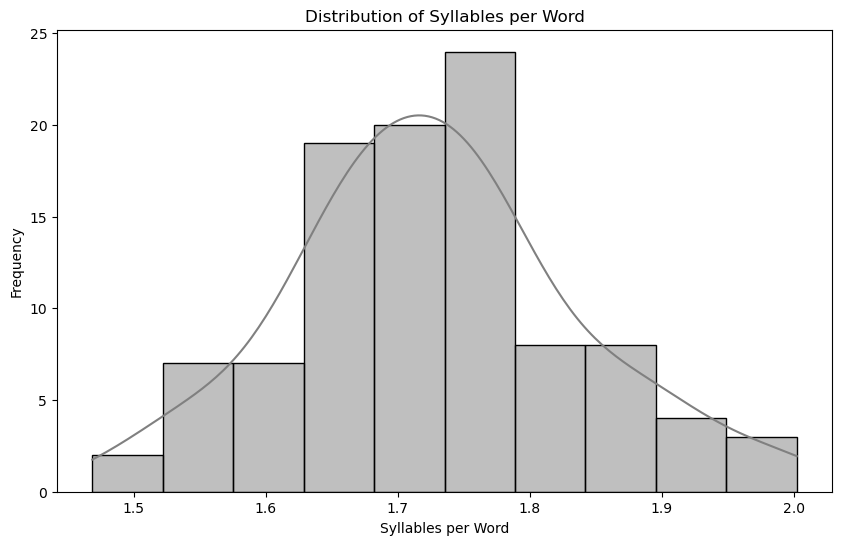

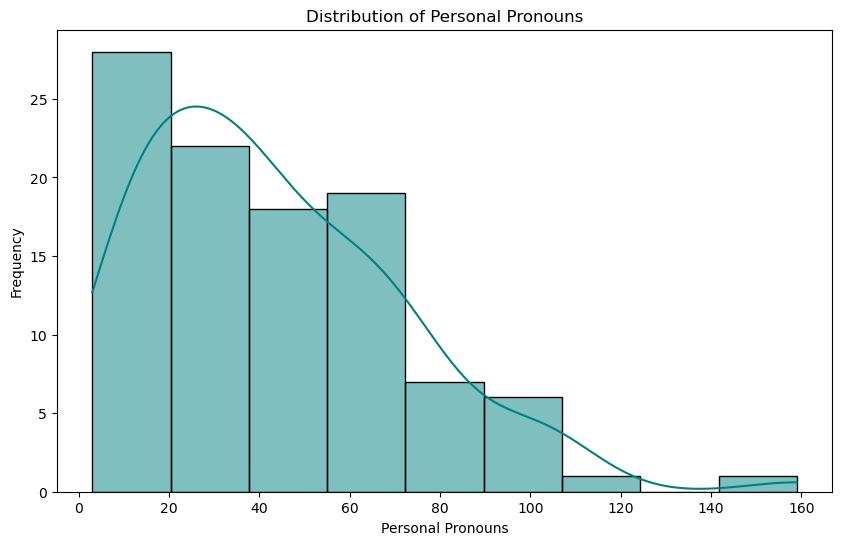

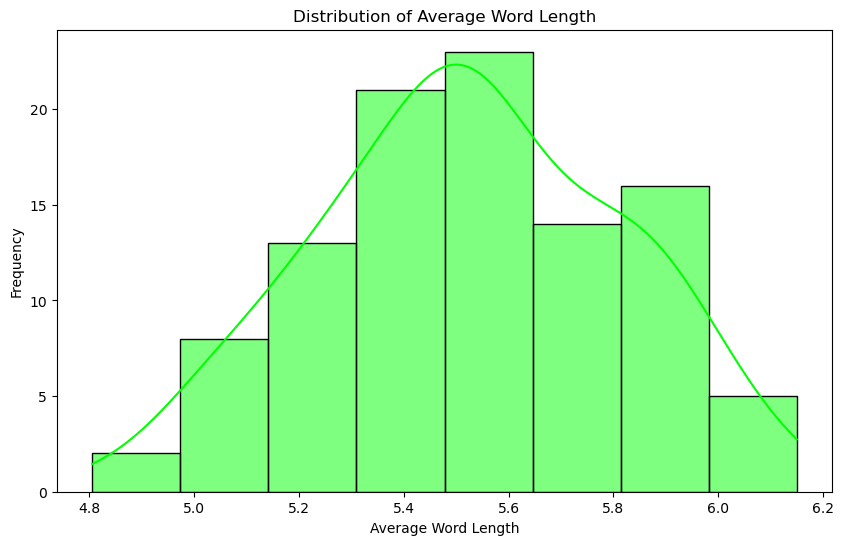

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize Positive Score and Negative Score
plt.figure(figsize=(10, 6))
sns.histplot(data=df1, x='Positive Score', kde=True, color='blue', label='Positive Score')
sns.histplot(data=df1, x='Negative Score', kde=True, color='red', label='Negative Score')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Positive and Negative Scores')
plt.legend()
plt.show()

# Visualize Polarity Score and Subjectivity Score
plt.figure(figsize=(10, 6))
sns.histplot(data=df1, x='Polarity Score', kde=True, color='green', label='Polarity Score')
sns.histplot(data=df1, x='Subjectivity Score', kde=True, color='orange', label='Subjectivity Score')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Polarity and Subjectivity Scores')
plt.legend()
plt.show()

# Visualize Average Sentence Length
plt.figure(figsize=(10, 6))
sns.histplot(data=df1, x='Avg Sentence Length', kde=True, color='purple')
plt.xlabel('Average Sentence Length')
plt.ylabel('Frequency')
plt.title('Distribution of Average Sentence Length')
plt.show()

# Visualize Percentage of Complex Words
plt.figure(figsize=(10, 6))
sns.histplot(data=df1, x='Percentage of Complex Words', kde=True, color='cyan')
plt.xlabel('Percentage of Complex Words')
plt.ylabel('Frequency')
plt.title('Distribution of Percentage of Complex Words')
plt.show()

# Visualize Fog Index
plt.figure(figsize=(10, 6))
sns.histplot(data=df1, x='Fog Index', kde=True, color='magenta')
plt.xlabel('Fog Index')
plt.ylabel('Frequency')
plt.title('Distribution of Fog Index')
plt.show()

# Visualize Average Number of Words per Sentence
plt.figure(figsize=(10, 6))
sns.histplot(data=df1, x='Avg Number of Words per Sentence', kde=True, color='brown')
plt.xlabel('Average Number of Words per Sentence')
plt.ylabel('Frequency')
plt.title('Distribution of Average Number of Words per Sentence')
plt.show()

# Visualize Complex Word Count
plt.figure(figsize=(10, 6))
sns.histplot(data=df1, x='Complex Word Count', kde=True, color='pink')
plt.xlabel('Complex Word Count')
plt.ylabel('Frequency')
plt.title('Distribution of Complex Word Count')
plt.show()

# Visualize Syllables per Word
plt.figure(figsize=(10, 6))
sns.histplot(data=df1, x='Syllables per Word', kde=True, color='gray')
plt.xlabel('Syllables per Word')
plt.ylabel('Frequency')
plt.title('Distribution of Syllables per Word')
plt.show()

# Visualize Personal Pronouns
plt.figure(figsize=(10, 6))
sns.histplot(data=df1, x='Personal Pronouns', kde=True, color='teal')
plt.xlabel('Personal Pronouns')
plt.ylabel('Frequency')
plt.title('Distribution of Personal Pronouns')
plt.show()

# Visualize Average Word Length
plt.figure(figsize=(10, 6))
sns.histplot(data=df1, x='Avg Word Length', kde=True, color='lime')
plt.xlabel('Average Word Length')
plt.ylabel('Frequency')
plt.title('Distribution of Average Word Length')
plt.show()


In [14]:
# Define a function to determine sentiment based on scores
def determine_sentiment(row):
    if row['Positive Score'] > row['Negative Score']:
        return 'positive'
    elif row['Negative Score'] > row['Positive Score']:
        return 'negative'
    else:
        # If positive score equals negative score, use polarity for tie-breaking
        if row['Polarity Score'] > 0:
            return 'positive'
        elif row['Polarity Score'] < 0:
            return 'negative'
        else:
            return 'neutral'

# Add a new column 'Sentiment' to the DataFrame
df1['Sentiment'] = df1.apply(determine_sentiment, axis=1)

# Display the updated DataFrame with the 'Sentiment' column
df1.Sentiment



0      positive
1      positive
2      positive
3      positive
4      positive
         ...   
97     negative
98     negative
99     positive
100    positive
101    positive
Name: Sentiment, Length: 102, dtype: object

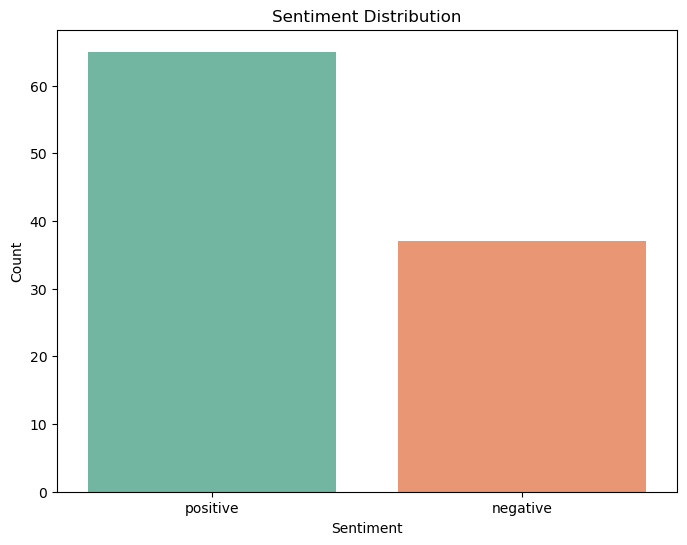

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a count plot
plt.figure(figsize=(8, 6))
sns.countplot(data=df1, x='Sentiment', palette='Set2')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()


In [16]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Fit and transform the 'Sentiment' column
df1['Sentiment'] = label_encoder.fit_transform(df1['Sentiment'])

# Display the updated DataFrame with the encoded 'Sentiment' column
df1['Sentiment']


0      1
1      1
2      1
3      1
4      1
      ..
97     0
98     0
99     1
100    1
101    1
Name: Sentiment, Length: 102, dtype: int32

In [17]:
df1

,URL,Tittle,Text,No of character,No of word,No of sentences,Positive Score,Negative Score,Polarity Score,Subjectivity Score,Avg Sentence Length,Percentage of Complex Words,Fog Index,Avg Number of Words per Sentence,Complex Word Count,Word Count,Syllables per Word,Personal Pronouns,Avg Word Length,Sentiment
0,https://insights.blackcoffer.com/rise-of-telem...,Rise of telemedicine and its Impact on Livelih...,"\nTelemedicine, the use of technology to diagn...",11175,1850,80,83,24,0.136034,0.437280,139.687500,0.319459,56.002784,23.125000,591,1850,2.002162,46,6.040541,1
1,https://insights.blackcoffer.com/rise-of-e-hea...,Rise of e-health and its impact on humans by t...,"\nThe rise of e-health, or the use of electron...",4013,664,25,41,13,0.111801,0.615704,160.520000,0.332831,64.341133,26.560000,221,664,1.986446,19,6.043675,1
2,https://insights.blackcoffer.com/rise-of-telem...,Rise of telemedicine and its Impact on Livelih...,"\n“More gains on quality, affordability and ac...",8176,1374,60,42,27,0.139706,0.385624,136.266667,0.320961,54.635051,22.900000,441,1374,1.881368,31,5.950509,1
3,https://insights.blackcoffer.com/rise-of-telem...,Rise of telemedicine and its Impact on Livelih...,"\n“More gains on quality, affordability and ac...",8176,1374,60,42,27,0.139706,0.385624,136.266667,0.320961,54.635051,22.900000,441,1374,1.881368,31,5.950509,1
4,https://insights.blackcoffer.com/rise-of-chatb...,Rise of Chatbots and its impact on customer su...,\nThe human race is known to come up with inve...,7664,1302,65,52,10,0.085951,0.459432,117.907692,0.330261,47.295181,20.030769,430,1302,1.847158,31,5.886329,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,https://insights.blackcoffer.com/coronavirus-i...,Coronavirus: Impact on the Hospitality Industry,\nBefore jumping on the topic I would like to ...,4413,765,30,8,22,0.077797,0.432445,147.100000,0.265359,58.946144,25.500000,203,765,1.742484,3,5.768627,0
98,https://insights.blackcoffer.com/coronavirus-i...,Coronavirus impact on energy markets,\nAs the coronavirus spreads around the world ...,10596,1887,50,26,62,0.013231,0.401288,211.920000,0.256492,84.870597,37.740000,484,1887,1.777954,12,5.615262,0
99,https://insights.blackcoffer.com/what-are-the-...,What are the key policies that will mitigate t...,"\nFrom Alibaba to Ping An and Google to Ford, ...",11114,1961,70,97,30,0.133756,0.451958,158.771429,0.286588,63.623207,28.014286,562,1961,1.758287,57,5.667517,1
100,https://insights.blackcoffer.com/marketing-dri...,Marketing Drives Results With A Focus On Problems,"\nWhen\nthe British ruled India, many Indians\...",8714,1580,59,32,20,0.073452,0.434461,147.694915,0.256962,59.180751,26.779661,406,1580,1.692405,48,5.515190,1


#### Text Mining

In [18]:
import warnings 
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords

def clean_text(df, df_column_name):
    # Replace URLs with 'webaddress'
    df[df_column_name] = df[df_column_name].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$', 'webaddress')

    # Converting all messages to lowercase
    df[df_column_name] = df[df_column_name].str.lower()

    # Replace email addresses with 'email'
    df[df_column_name] = df[df_column_name].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress')

    # Replace money symbols with 'dollars' (£ can be typed with ALT key + 156)
    df[df_column_name] = df[df_column_name].str.replace(r'£|\$', 'dollars')

    # Replace 10-digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
    df[df_column_name] = df[df_column_name].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', 'phonenumber')

    # Replace numbers with 'numbr'
    df[df_column_name] = df[df_column_name].str.replace(r'\d+(\.\d+)?', 'numbr')

    # Remove punctuation
    df[df_column_name] = df[df_column_name].str.replace(r'[^\w\d\s]', ' ')

    # Replace whitespace between terms with a single space
    df[df_column_name] = df[df_column_name].str.replace(r'\s+', ' ')

    # Remove leading and trailing whitespace
    df[df_column_name] = df[df_column_name].str.replace(r'^\s+|\s+?$', '')

    # Remove stopwords
    stop_words = set(stopwords.words('english') + ['u', 'ü', 'â', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
    df[df_column_name] = df[df_column_name].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

clean_text(df1, 'Text')

# Display the updated DataFrame
df1.Text


0      telemedicine use technology diagnose treat pat...
1      rise e health use electronic means facilitate ...
2      gains quality affordability accessibility way ...
3      gains quality affordability accessibility way ...
4      human race known come inventions decide future...
                             ...                        
97     jumping topic would like give overview coronav...
98     coronavirus spreads around world countries imp...
99     alibaba ping google ford companies around glob...
100    british ruled india many indians accepted work...
101    business business longer business increase bot...
Name: Text, Length: 102, dtype: object

#### Word Cloud

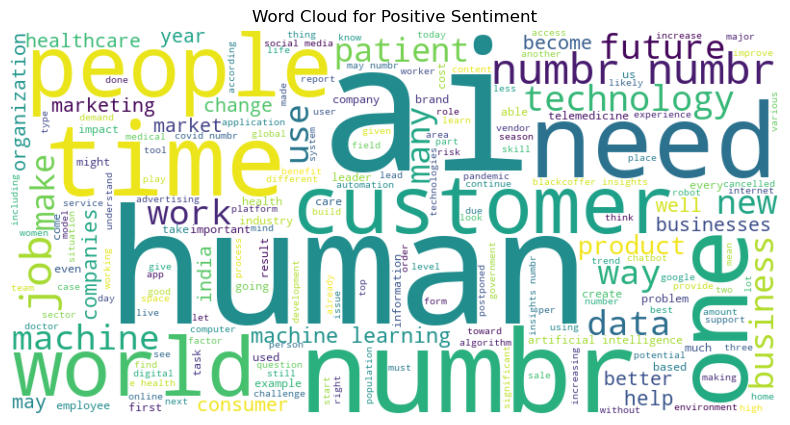

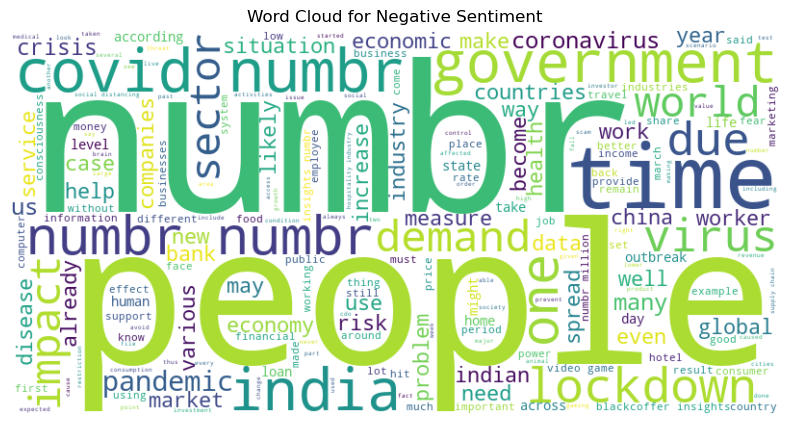

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter the DataFrame for positive sentiment
positive_text = ' '.join(df1[df1['Sentiment'] == 1]['Text'])

# Generate a word cloud for positive sentiment
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Plot the positive sentiment word cloud
plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Sentiment')
plt.axis('off')
plt.show()

# Filter the DataFrame for negative sentiment
negative_text = ' '.join(df1[df1['Sentiment'] == 0]['Text'])

# Generate a word cloud for negative sentiment
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Plot the negative sentiment word cloud
plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Negative Sentiment')
plt.axis('off')
plt.show()


In [24]:
# Saving the final dataset

df1.to_csv('final_text_dataset.csv',index=False)

In [26]:
# converting text into numeric using Tfidfvextorizer

from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(max_features=3000)
features = tf.fit_transform(df1['Text'])
X = features
Y = df1.Sentiment

In [27]:
X.shape

(102, 3000)

In [28]:
Y.shape

(102,)

### Machine Learning Model Building


In [31]:
# Importing Machine Learning Model/Algorithm libraries

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,precision_score,classification_report,accuracy_score

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=66, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (71, 3000)
Training target vector size: (71,)
Test feature matrix size: (31, 3000)
Test target vector size: (31,)


##### * Logistics Regression

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=99, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Precision Score of Logistics Regression :'+'\033[0m', precision_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))


from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(log_reg, X, Y, cv =5, scoring='precision')
print('\033[1m'+'Cross Validation Score', log_reg, ':'+'\033[0m\n')
print("Precision CVScore :" ,CVscore)
print("Mean CV Precision Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.9032258064516129


Precision Score of Logistics Regression : 0.92


Confusion matrix of Logistics Regression : 
 [[ 5  2]
 [ 1 23]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.92      0.96      0.94        24

    accuracy                           0.90        31
   macro avg       0.88      0.84      0.85        31
weighted avg       0.90      0.90      0.90        31

Cross Validation Score LogisticRegression() :

Precision CVScore : [0.65       0.68421053 0.8125     0.8125     0.86666667]
Mean CV Precision Score : 0.7651754385964913
Std deviation : 0.08318701374106076


**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

##### * Random Forest Classifier

In [35]:
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
y_pred=rfc.predict(X_test)
print('\033[1m'+'Random Forest Classifier'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Random Forest Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Precision Score of Random Forest Classifier :'+'\033[0m', precision_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Random Forest Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Random Forest Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))


from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(rfc, X, Y, cv =5, scoring='precision')
print('\033[1m'+'Cross Validation Score', rfc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Precision Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Random Forest Classifier


Accuracy Score of Random Forest Classifier : 0.8064516129032258


Precision Score of Random Forest Classifier : 0.875


Confusion matrix of Random Forest Classifier : 
 [[ 4  3]
 [ 3 21]]


classification Report of Random Forest Classifier 
               precision    recall  f1-score   support

           0       0.57      0.57      0.57         7
           1       0.88      0.88      0.88        24

    accuracy                           0.81        31
   macro avg       0.72      0.72      0.72        31
weighted avg       0.81      0.81      0.81        31

Cross Validation Score RandomForestClassifier() :

CVScore : [0.68421053 0.8125     0.92857143 0.86666667 0.9       ]
Mean CV Precision Score : 0.838389724310777
Std deviation : 0.0862202461630928


**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

##### * AdaBoost Classifier

In [37]:
adbc=AdaBoostClassifier()
adbc.fit(X_train,Y_train)
y_pred=adbc.predict(X_test)
print('\033[1m'+'AdaBoost Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of AdaBoost Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Precision Score of Extra Trees Classifier :'+'\033[0m', precision_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of AdaBoost Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of AdaBoost Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))



from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(adbc, X, Y, cv =5, scoring='precision')
print('\033[1m'+'Cross Validation Score',adbc, ':'+'\033[0m\n')
print("Precision CVScore :" ,CVscore)
print("Mean Precision CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

AdaBoost Classifier Evaluation


Accuracy Score of AdaBoost Classifier : 0.9032258064516129


Precision Score of Extra Trees Classifier : 0.9565217391304348


Confusion matrix of AdaBoost Classifier : 
 [[ 6  1]
 [ 2 22]]


classification Report of AdaBoost Classifier 
               precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       0.96      0.92      0.94        24

    accuracy                           0.90        31
   macro avg       0.85      0.89      0.87        31
weighted avg       0.91      0.90      0.91        31

Cross Validation Score AdaBoostClassifier() :

Precision CVScore : [0.66666667 0.73333333 0.86666667 0.84615385 0.88888889]
Mean Precision CV Score : 0.8003418803418804
Std deviation : 0.08567087525935518


**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

##### * MultinomialNB Classifier

In [38]:

mnb = MultinomialNB()
mnb.fit(X_train,Y_train)
y_pred=mnb.predict(X_test)
print('\033[1m'+'MultinomialNB Classifier'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of MultinomialNB Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Precision Score of MultinomialNB Classifier :'+'\033[0m', precision_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of MultinomialNB Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of MultinomialNB Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(mnb, X, Y, cv =5, scoring='precision')
print('\033[1m'+'Cross Validation Score', mnb, ':'+'\033[0m\n')
print("Precision CVScore :" ,CVscore)
print("Mean Precision CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

MultinomialNB Classifier


Accuracy Score of MultinomialNB Classifier : 0.9032258064516129


Precision Score of MultinomialNB Classifier : 0.92


Confusion matrix of MultinomialNB Classifier : 
 [[ 5  2]
 [ 1 23]]


classification Report of MultinomialNB Classifier 
               precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.92      0.96      0.94        24

    accuracy                           0.90        31
   macro avg       0.88      0.84      0.85        31
weighted avg       0.90      0.90      0.90        31

Cross Validation Score MultinomialNB() :

Precision CVScore : [0.65       0.68421053 0.8125     0.8        0.85714286]
Mean Precision CV Score : 0.7607706766917294
Std deviation : 0.07954125885650956


**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**Based on the evaluation of four machine learning models, it is evident that the Multinomial Naive Bayes (MultinomialNB) and AdaBoost Classifier models have emerged as the top performers.** Both models achieved an impressive accuracy of approximately 90.32%, demonstrating their ability to make correct predictions. Additionally, the precision scores for these models are also high, with MultinomialNB scoring 92% precision and AdaBoost Classifier scoring 95.65% precision for the positive class. These high precision scores suggest that the models are effective in correctly identifying positive instances.

While Random Forest Classifier and Logistic Regression also performed well with accuracies of 80.65% and 90.32% respectively, their precision scores for the positive class were slightly lower compared to MultinomialNB and AdaBoost.

To further enhance model performance, hyperparameter tuning can be applied to the MultinomialNB and AdaBoost Classifier models.

In [40]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

# Define the AdaBoostClassifier
ada_classifier = AdaBoostClassifier()

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 150],      # Number of weak learners (decision trees)
    'learning_rate': [0.01, 0.1, 1.0],  # Learning rate
    'algorithm': ['SAMME', 'SAMME.R']    # Algorithm to use
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=ada_classifier, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, Y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", best_params)



Best Parameters: {'algorithm': 'SAMME', 'learning_rate': 0.01, 'n_estimators': 50}


In [58]:
from sklearn.ensemble import AdaBoostClassifier

# Create an instance of the AdaBoostClassifier with the best parameters
best_ada_classifier = AdaBoostClassifier( algorithm="SAMME.R",learning_rate=0.2,n_estimators=50)

# Train the best AdaBoost model on your training data
best_ada_classifier.fit(X_train, Y_train)
y_pred=best_ada_classifier.predict(X_test)
# Now the 'best_ada_classifier' is trained and ready for making predictions.

print('\033[1m'+' After HPT AdaBoost Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of AdaBoost Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Precision Score of Extra Trees Classifier :'+'\033[0m', precision_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of AdaBoost Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of AdaBoost Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

 After HPT AdaBoost Classifier Evaluation


Accuracy Score of AdaBoost Classifier : 0.9354838709677419


Precision Score of Extra Trees Classifier : 0.9230769230769231


Confusion matrix of AdaBoost Classifier : 
 [[ 5  2]
 [ 0 24]]


classification Report of AdaBoost Classifier 
               precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.92      1.00      0.96        24

    accuracy                           0.94        31
   macro avg       0.96      0.86      0.90        31
weighted avg       0.94      0.94      0.93        31



- **After performing hyperparameter tuning (HPT) on the AdaBoost Classifier, the model's performance has improved significantly. The accuracy score has increased to 93.55%, indicating that the tuned model is making correct predictions for the majority of instances. The precision score, which measures the accuracy of positive predictions, is also high at 92.31%, demonstrating the model's ability to correctly identify positive instances.**

- **In the confusion matrix, there are only 2 instances incorrectly predicted out of 31 total instances, with 24 true positives, further emphasizing the model's improved performance. The classification report shows high precision, recall, and F1-score for both classes (0 and 1), indicating balanced and accurate predictions.**

In [59]:
# Saving the Model

import pickle

with open('Sentiment_Analysis.pkl', 'wb') as model_file:
    pickle.dump(best_ada_classifier, model_file)

In [64]:
# loading the model and perdicting

import pickle

# Load the saved AdaBoost model
with open('Sentiment_Analysis.pkl', 'rb') as model_file:
    Sentiment_Analysis = pickle.load(model_file)

predicted_labels = Sentiment_Analysis.predict(X_test)

# Map numeric labels to sentiment labels
sentiment_labels = ['negative' if label == 0 else 'positive' for label in predicted_labels]
sentiment_labels

['positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive']